In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
import os
import json
import matplotlib.pyplot as plt

(100, 3000)
(100, 3000)
(100, 3000)
(100, 3000)
(100, 3000)
(100, 3000)


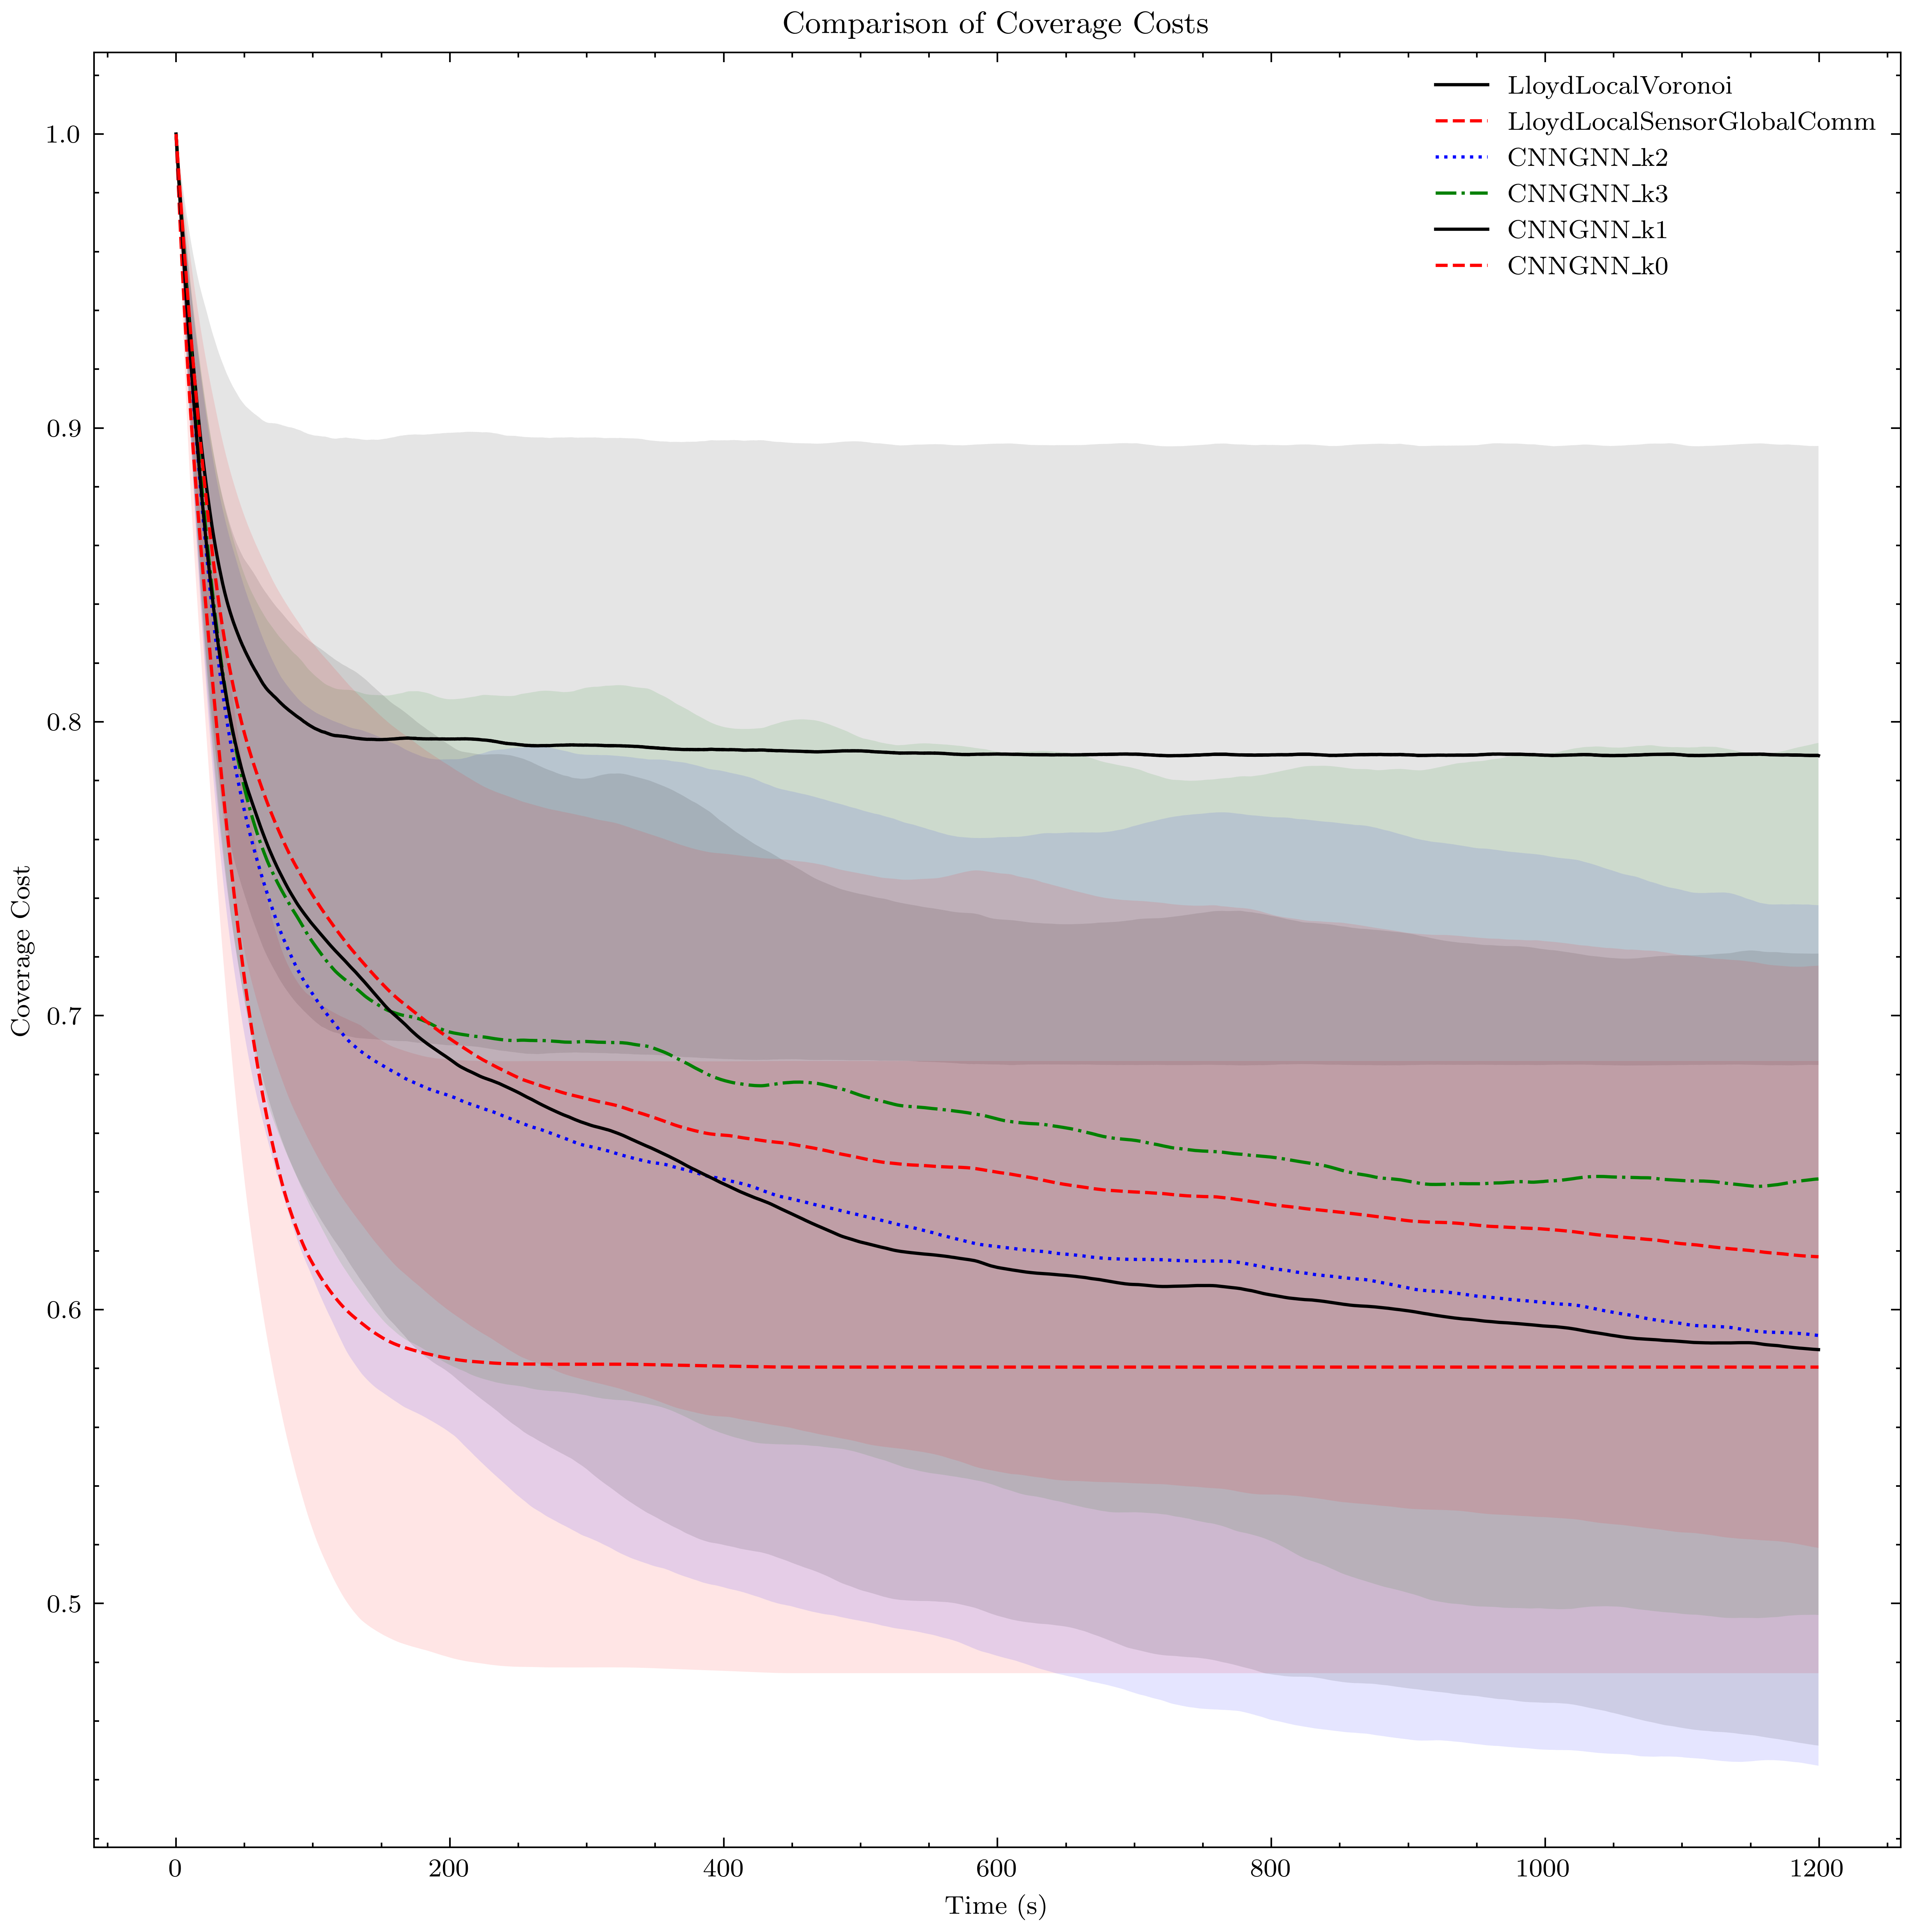

In [7]:
from numpy import genfromtxt

import scienceplots

def compute_quartiles(data):
    Q1, median, Q3 = np.percentile(data, [25, 50, 75])

    IQR = Q3 - Q1

    loval = Q1 - 1.5 * IQR
    hival = Q3 + 1.5 * IQR

    wiskhi = np.compress(data <= hival, data)
    wisklo = np.compress(data >= loval, data)
    actual_hival = np.max(wiskhi)
    actual_loval = np.min(wisklo)

    Qs = [np.mean(data), actual_loval, actual_hival]
    return Qs


results_dir = '/root/CoverageControl_ws/results_0_2/'
controllers = ["LloydLocalVoronoi","LloydLocalSensorGlobalComm", "CNNGNN_k2", "CNNGNN_k3","CNNGNN_k1", "CNNGNN_k0"]
#controllers = ["LloydLocalVoronoi","LloydLocalSensorGlobalComm", "CNNGNN_k2", "CNNGNN_k3","CNNGNN_k1"]


num_controllers = len(controllers)

data = []
data_std = []
for controller in controllers:
    file_name = results_dir + controller + '/eval.csv'
    controller_data = genfromtxt(file_name, delimiter=',')
    print(controller_data.shape)
    for i in range(controller_data.shape[0]):
        controller_data[i] = controller_data[i]/np.squeeze(controller_data[i, 0])

    data.append(np.mean(controller_data[:, :], axis = 0))
    data_std.append(np.std(controller_data[:, :], axis = 0))


#lloyds = np.stack(cov["lloyds"])
#Qs_all = np.zeros((num_controllers, episode_size, 3))
#for c in range(num_controllers):
#    cov[controllers[c]] = (np.mean(coverage_data_all[c], axis=0), np.std(coverage_data_all[c], axis=0))
#    for i in range(episode_size):
#        Qs_all[c, i] = (compute_quartiles(coverage_data_all[c, :, i]))
    #prev_val = np.stack(cov[c])
    #cov[c] = (np.mean(np.stack(cov[c]), axis=0), np.std(np.stack(cov[c]), axis=0))
    #cov[f"{c}_norm"] = (np.mean(prev_val/lloyds, axis=0), np.std(prev_val/lloyds, axis=0))
    #exp[c] = np.mean(np.stack(exp[c]), axis=0)
    #wexp[c] = np.mean(np.stack(wexp[c]), axis=0)


SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 22

#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
#plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
#plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
#plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

xvals = np.asarray(range(0, controller_data.shape[1]))*0.4
plt.figure(figsize=(10,10))
for c in range(0, num_controllers):
    #plt.plot(Qs_all[c,:,1])
    plt.plot(xvals, data[c], label=controllers[c])
    plt.fill_between(xvals, data[c] + data_std[c], data[c] - data_std[c], alpha=0.1)

plt.style.use(['science','ieee'])
plt.xlabel('Time (s)')
plt.ylabel('Coverage Cost')
plt.title('Comparison of Coverage Costs')
plt.legend()

plt.show()

#plt.figure(figsize=(10,10))
#N = [50, 100, 500, 1000]
#cost_vals = []
#for i in range(len(controllers)):
#    c = controllers[i]
#    o = oracles[i]
#    cost_vals.append(np.min(cov[c][0][-1]) / np.min(cov[o][0][-1]))
#plt.plot(N, cost_vals)
#plt.xlabel('Number of Agents')
#plt.ylabel('Ratio of Learned to Expert Controller Costs')
#plt.title('Effect of Varying Agent Density', fontsize=22)
#plt.legend(controllers)
#plt.show()